# ***MACHINE LEARNING PROJECT***
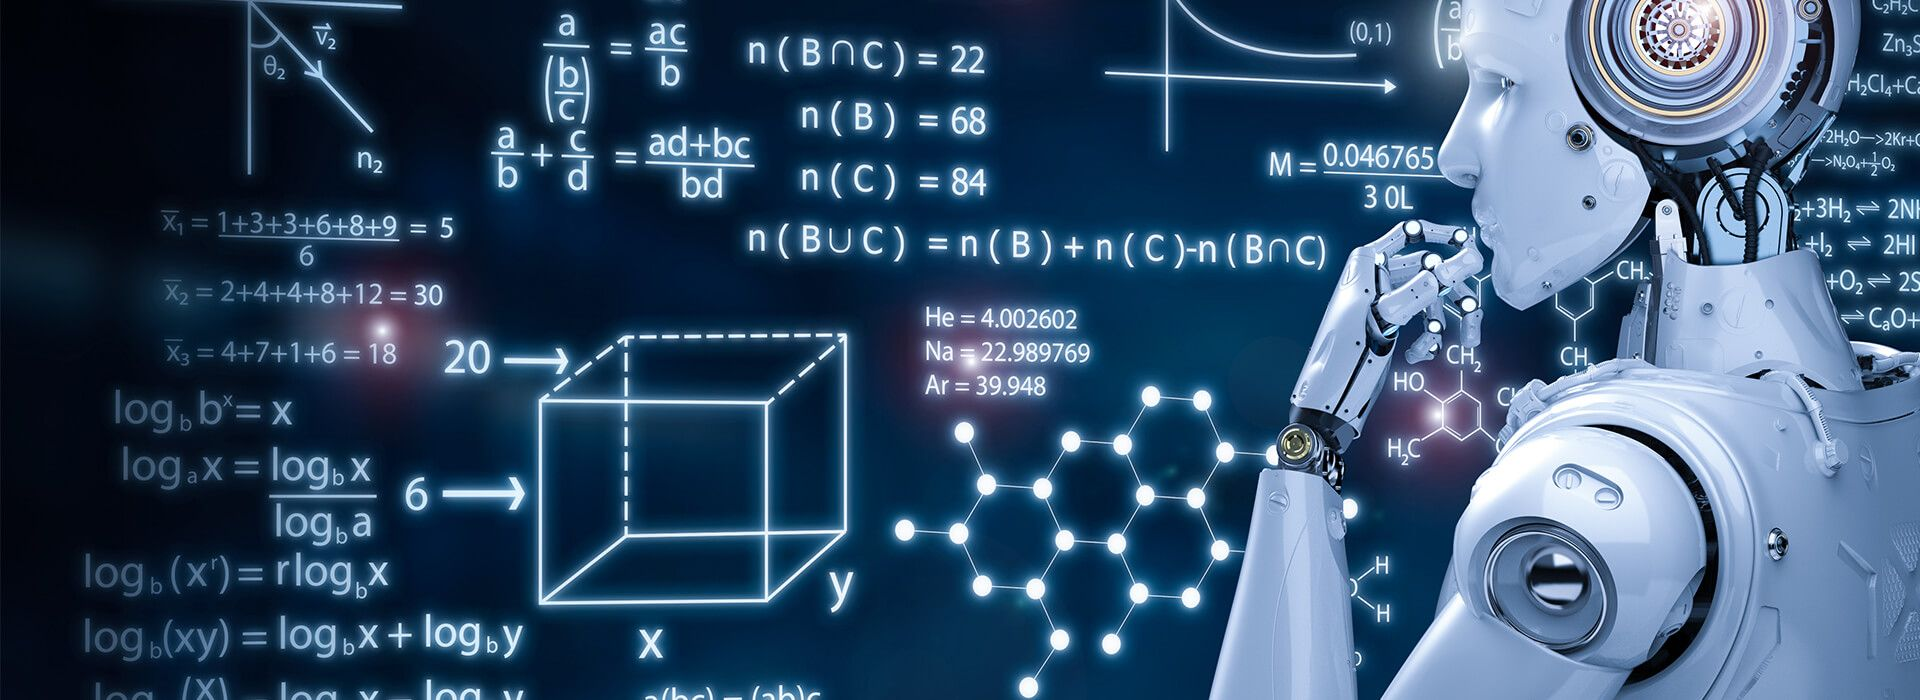

## **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## **LOADING DATASET**

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [6]:
data.shape

(4009, 4)

In [7]:
data.isnull().sum()

URLs         0
Headline     0
Body        21
Label        0
dtype: int64

## **APPLYING STEEMING**

In [8]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [9]:
data['Headline'] = data['Headline'].apply(stemming)

In [10]:
data['Headline']

0                 four way bob corker skewer donald trump
1       linklat war veteran comedi speak modern americ...
2                trump fight corker jeopard legisl agenda
3       egypt cheiron win tie pemex mexican onshor oil...
4                       jason aldean open snl vega tribut
                              ...                        
4004                                          trend watch
4005                      trump jr soon give minut speech
4006                       ron paul trump anarch altright
4007    china accept oversea trial data bid speed drug...
4008    vice presid mike penc leav nfl game anti ameri...
Name: Headline, Length: 4009, dtype: object

## **TRAINING AND TESTING DATA**

In [11]:
X = data['Headline'].values
y = data['Label'].values

In [12]:
# VECTORIZING THE TRAINING DATA
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **MODEL SELECTION**

In [14]:
models = [
          LogisticRegression(),
          SVC(kernel='linear'),
          KNeighborsClassifier(),
          RandomForestClassifier(random_state=0)
]

## **MODEL TRAINING AND PREDICTION**

In [15]:
def compare_models(headline):

  pred = ''

  for model in models:
    model.fit(X_train, y_train)
    print('------------', model  ,'-------------')

    test_data_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, test_data_prediction)
    print('Accuracy score for the = ', int(accuracy * 100),'%')
    
    values = vectorizer.transform([headline])
    prediction = model.predict(values)
    if prediction == 0:
        pred = 'Real News'
    elif prediction == 1:
        pred = 'Fake News'
    else:
        pred = 'None'
    print('Answer for the = ', pred)

    print('------------------------------------------------')
    print()


In [16]:
string  = input('Enter the Headline : ')

Enter the Headline : Cremated on same pyre, ashes of Gen Rawat, Madhulika to be taken to Haridwar


In [17]:
compare_models(string)

------------ LogisticRegression() -------------
Accuracy score for the =  83 %
Answer for the =  Real News
------------------------------------------------

------------ SVC(kernel='linear') -------------
Accuracy score for the =  84 %
Answer for the =  Real News
------------------------------------------------

------------ KNeighborsClassifier() -------------
Accuracy score for the =  79 %
Answer for the =  Real News
------------------------------------------------

------------ RandomForestClassifier(random_state=0) -------------
Accuracy score for the =  84 %
Answer for the =  Fake News
------------------------------------------------

